In [16]:
# This code below is to se the structure of the code for Pyramidal Neuron - Larkum style
# Learning through target spikes

import numpy as np

from lttb import LTTB

import matplotlib.pyplot as plt

from tqdm import trange
import random


N, I, O, T = 500, 5, 3, 400
shape = (N, I, O, T)

dt = .001
tau_m = 20. * dt
tau_s = 2. * dt
tau_ro = 10. * dt
tau_star = 20. * dt
tau_W = 200 * dt


beta = np.exp(-dt/tau_s)
beta_ro = np.exp(-dt/tau_ro)
beta_targ = np.exp(-dt/tau_star)
beta_W = np.exp(-dt/tau_W)

sigma_context = 20.
sigma_targ = 5.#10**1.5
sigma_in = 12.

dv = 1 / 500.
alpha = .005
alpha_rout = .01
Vo = - 4
h = - 1
s_inh = 20

sigma_Jrec = 0.
sigma_wrec = 0.
sigma_Jout = 0.1

Ne = 400
Ni = 100

N = Ne+Ni


n_contexts = 5

# Here we build the dictionary of the simulation parameters
par = {'dt' : dt, 'tau_m' : tau_m, 'tau_s' : tau_s, 'tau_ro' : tau_ro, 'tau_star' : tau_star,'tau_W' : tau_W,
       'dv' : dv, 'Vo' : Vo, 'h' : h, 's_inh' : s_inh,
       'N' : N, 'Ni' : Ni, 'Ne' : Ne, 'T' : T, 'I' : I, 'O' : O, 'shape' : shape, 
       'sigma_Jrec' : sigma_Jrec,'sigma_wrec' : sigma_wrec, 'sigma_Jout' : sigma_Jout,  'n_contexts' : n_contexts,
       'alpha' : alpha, 'alpha_rout' : alpha_rout,
       'sigma_in' : sigma_in, 'sigma_targ' : sigma_targ, 'sigma_context' : sigma_context, 'h' : h}

TIME = 1.

T = int(np.floor(TIME/dt))

nStepOutTraining = 1000

t_shut = 10

JMAX = 100.
nu_targ = 0.005


# Here we init our (recurrent) agent
lttb = LTTB (par)


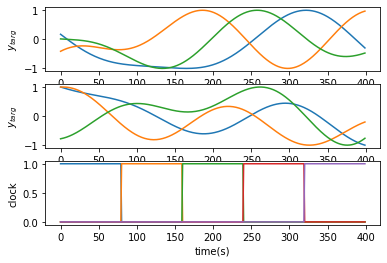

In [17]:
# define clock and target

lttb.y_targ_collection = []

for k in range(n_contexts):
    lttb.init_targ(par)
    lttb.y_targ_collection.append(lttb.y_targ)


lttb.init_clock(par)


plt.figure()
plt.subplot(311)
plt.plot(np.array(lttb.y_targ_collection[0]).T)
plt.ylabel('$y_{targ}$')
plt.subplot(312)
plt.plot(np.array(lttb.y_targ_collection[1]).T)
plt.ylabel('$y_{targ}$')
plt.subplot(313)
plt.plot(np.array(lttb.I_clock).T)
plt.xlabel('time(s)')
plt.ylabel('clock')
plt.show()


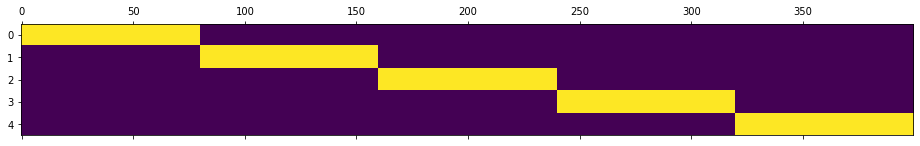

In [18]:
plt.matshow(lttb.I_clock,aspect='auto')

MATLAB code to be converted below

In [ ]:
## Training Rec

gamma = 10.
def f(x,gamma):
    return np.exp(x*gamma)/(np.exp(x*gamma)+1)
#f1 = @(x)(gamma*exp(gamma*x))./(exp(gamma*x)+1)-(gamma*exp(2*gamma*x))./(exp(gamma*x)+1).^2;

apicalFactorTrain = 1
apicalFactorTest = 0

nIterRec = 50

eta = 5.
eta_out = 0.1
etaW = .0


for iter in range(nIterRec):
    
    ###### Online-Training

    #initialize simulation
    
    for cont_index in range(n_contexts):
    
        lttb.cont = lttb.cont*0
        lttb.cont[cont_index] = 1
        
        lttb.y_targ = lttb.y_targ_collection[cont_index]
        

        lttb.initialize(par)

        #run simulation
        dH = 0

        for t in range(lttb.T-2):
            
            lttb.step(apicalFactor = apicalFactorTrain)

            dH = dH*(1-dt/tau_m) + dt/tau_m*lttb.S_filt[:,t]

            DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*(1-lttb.S_apic_dist[:,t]) ,dH)
            lttb.J =  lttb.J + eta*DJ

            SR = lttb.S_filtRO[:,t+1]#lttb.B_filt_rec[:,t+1]#
            Y = lttb.Jout@SR
            DJRO = np.outer(lttb.y_targ[:,t+1] - Y,SR.T)
            lttb.Jout =  lttb.Jout + eta_out*DJRO
        
    ###### Test
    
    if iter%5==0:

        for cont_index in range(n_contexts):

            lttb.cont = lttb.cont*0
            lttb.cont[cont_index] = 1
            
            lttb.y_targ = lttb.y_targ_collection[cont_index]

            lttb.initialize(par)

            #run simulation

            for t in range(lttb.T-2):
                
                lttb.step(apicalFactor = apicalFactorTest)

            SR = lttb.S_filtRO[:,1:-2]# lttb.B_filt_rec[:,1:-2]#
            Y = lttb.Jout@SR
            mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

            print(mse_rec_train)
            

0.22703501462714193
0.3188377532093406
0.1867727104974897
0.30865850563830527
0.12193810148436678
0.20272815282916987
0.29099993376424194
0.1578905098813074
0.22146473086669502
0.1362394872814985
0.23365600472664846
0.3084798230311688
0.17919249196725962
0.2564931234608684
0.11704135394308125
0.1787934669286202
0.31992500712338134
0.14770193203239076
0.2035232464032649
0.11202158130380185
0.19925205675024207
0.2627416771378789
0.1601573965221219
0.2574605809993786
0.12670877606351993
0.23031590769389895
0.27717350355159687
0.14744514833316025
0.2423739096258242
0.11437110450302068
0.17081482668251322
0.26682339791134463
0.13183236221300448
0.18427295803836596
0.13105113789511239
0.19223965495739462
0.24849017389415343
0.1853566450544277
0.26682233379291775
0.10974813416161597
0.1858355695220186
0.25513630563545453
0.14011037262550763
0.24293771261406885
0.1128376204821512
0.1683783824524296
0.2711137190982336
0.16382453963952132
0.29734831985087967
0.13584670020545891


0.19912122473943128


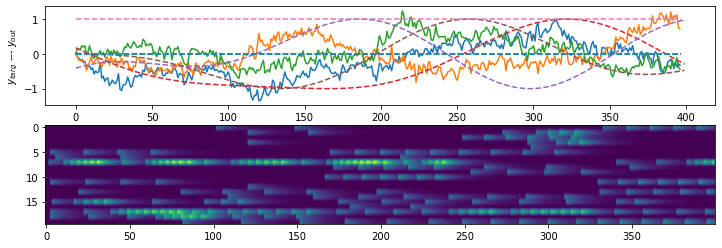

0.27880704581592225


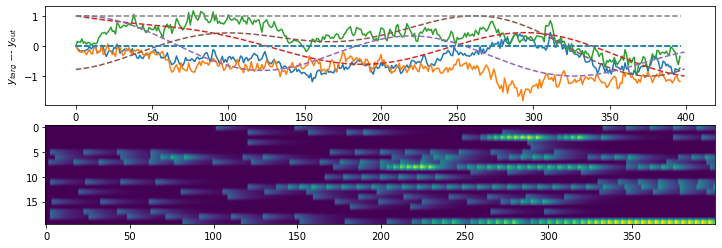

0.159412452108268


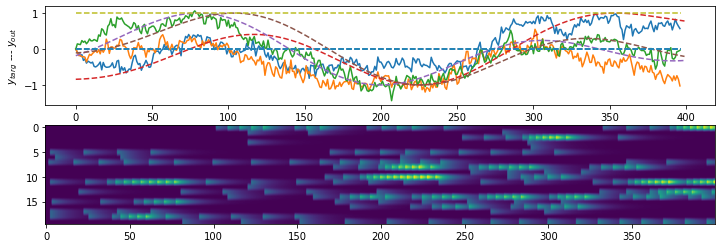

0.2807780619755954


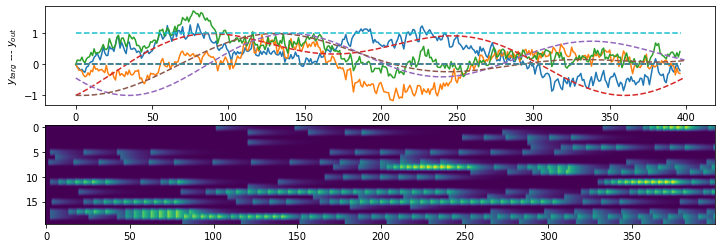

0.12726268326935472


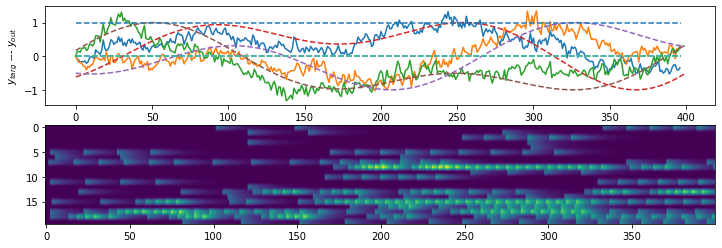

In [20]:
for cont_index in range(n_contexts):
    
    context = []

    lttb.cont = lttb.cont*0
    lttb.cont[cont_index] = 1

    lttb.y_targ = lttb.y_targ_collection[cont_index]

    lttb.initialize(par)

    #run simulation
    
    apicalFactor = 0

    for t in range(lttb.T-2):
 
        if t==200:
            apicalFactor = 0
            #lttb.cont = lttb.cont*0.1
            #lttb.cont[0] = 1
        context.append(lttb.cont)
          
        lttb.step(apicalFactor = apicalFactor)

    SR = lttb.S_filtRO[:,1:-2]#lttb.B_filt_rec[:,1:-2]#
    Y = lttb.Jout@SR
    mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

    print(mse_rec_train)
    
#mse, Y = lttb.train_ro(par,out_epochs = 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(211)
    plt.plot(Y.T)
    plt.plot(lttb.y_targ.T,'--')
    plt.plot(np.array(context),'--')
    
    plt.xlabel('time(s)')
    plt.ylabel('$y_{targ}$ --- $y_{out}$')
    plt.subplot(212)
    plt.imshow(lttb.S_filtRO[0:20,:],aspect='auto')
    
    #plt.subplot(313)
    #plt.imshow(lttb.S_wind[0:20,:],aspect='auto')
    
    plt.show()

0.19912122473943128


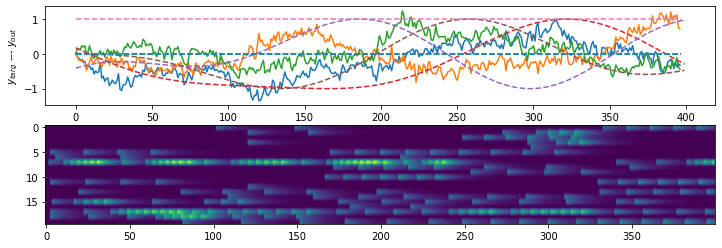

0.5113276334349202


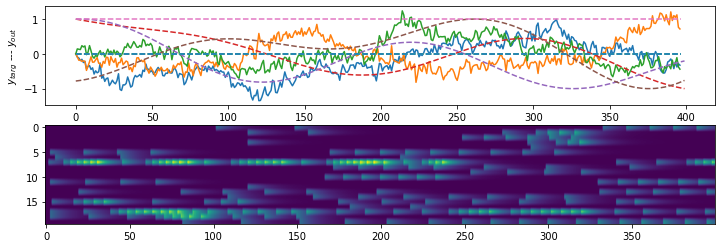

0.6791128347392613


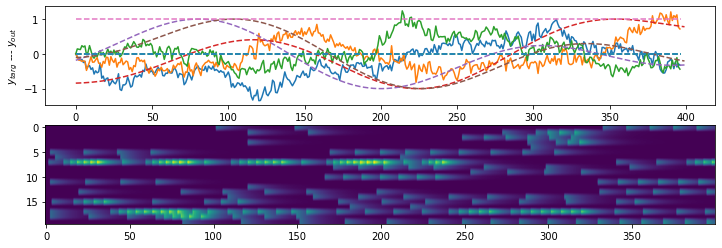

0.5827478608310659


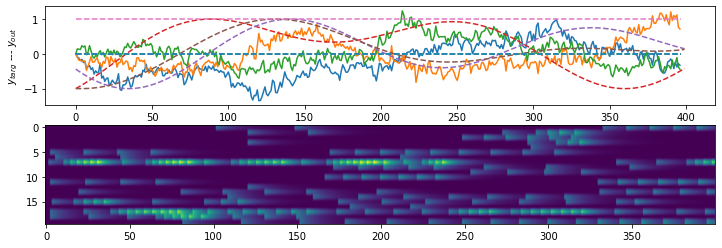

0.7372234492876745


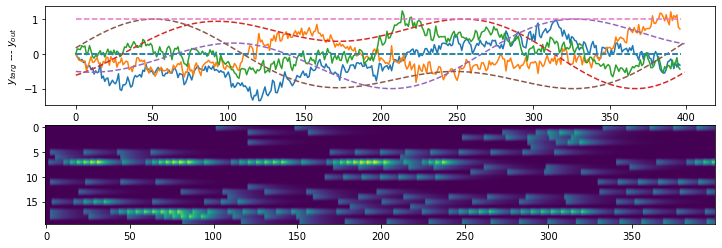

0.6607653458168488


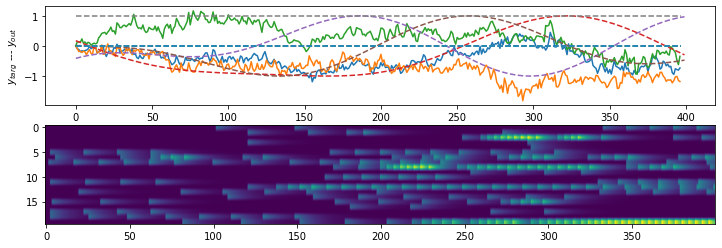

0.27880704581592225


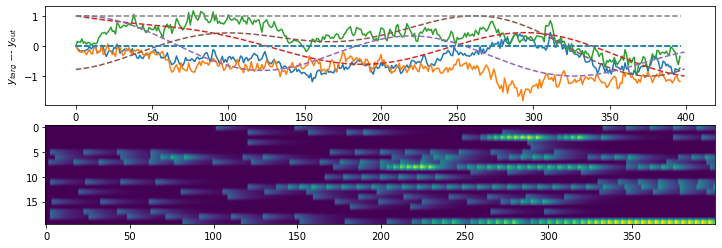

0.6479666449211141


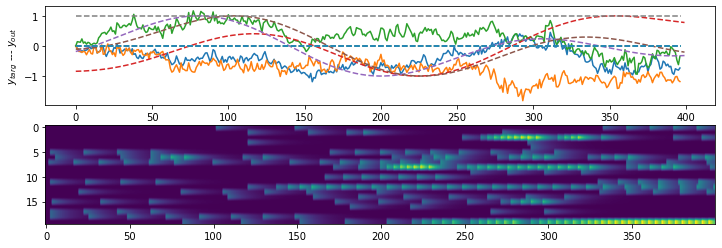

0.7595726843006857


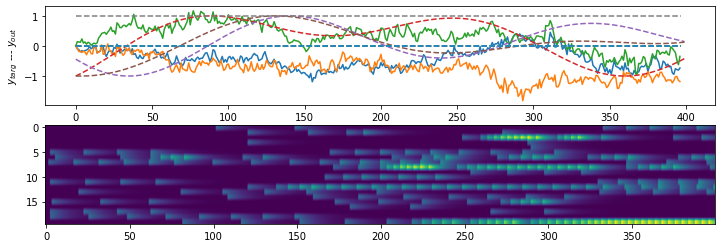

0.9354342863331295


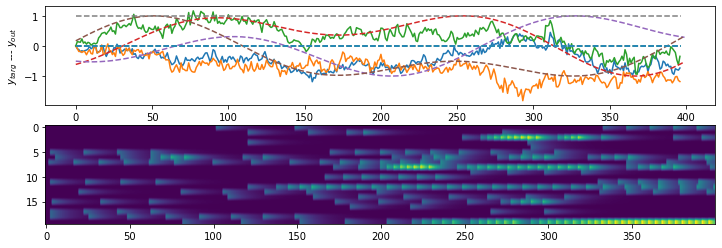

0.7816350492972706


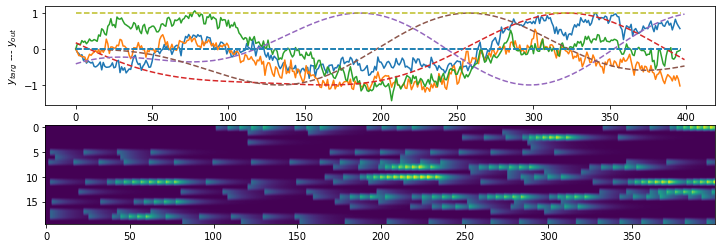

0.6473866610300018


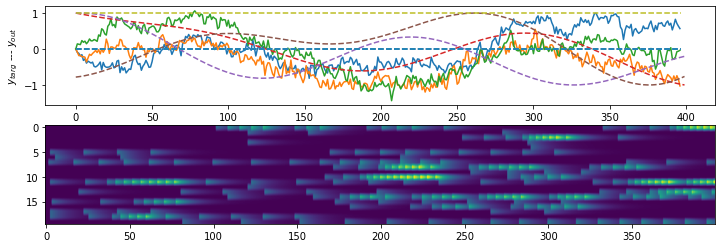

0.159412452108268


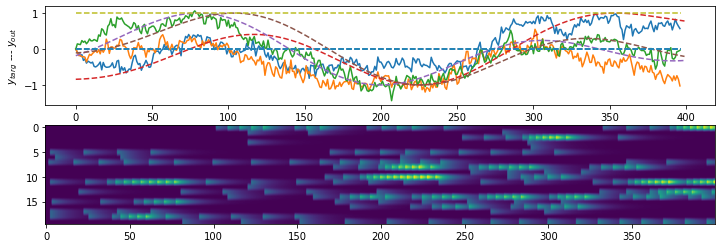

0.8080927197147442


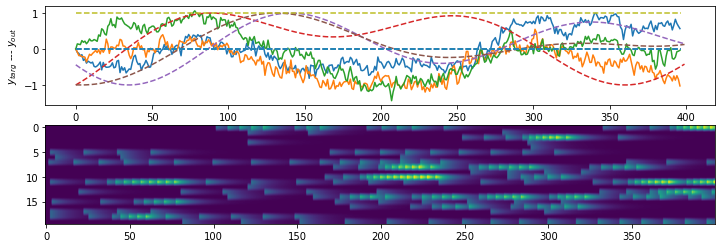

0.5780114134662659


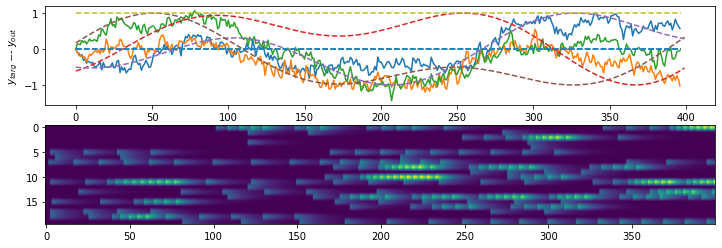

1.0356301948625255


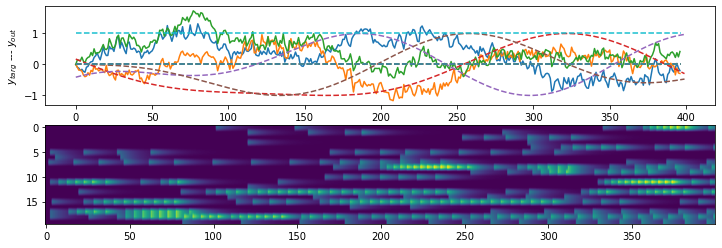

0.6437527372917975


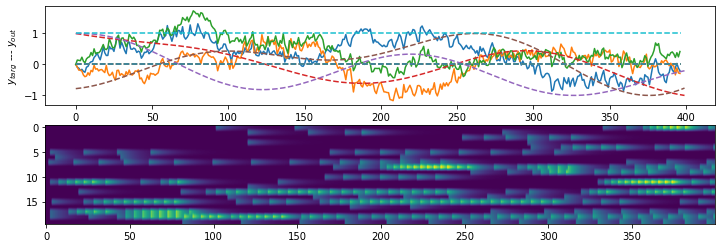

0.569936418622501


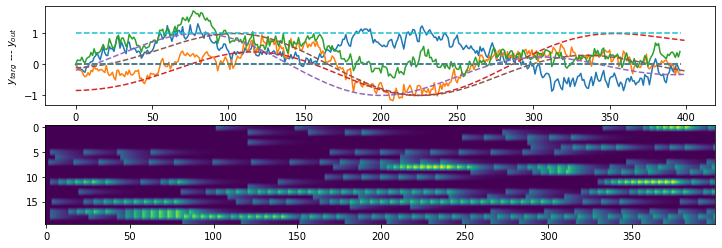

0.2807780619755954


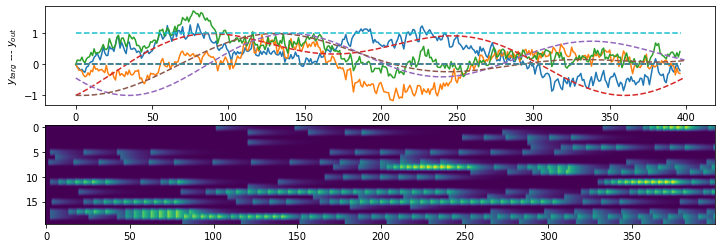

0.33151263112904567


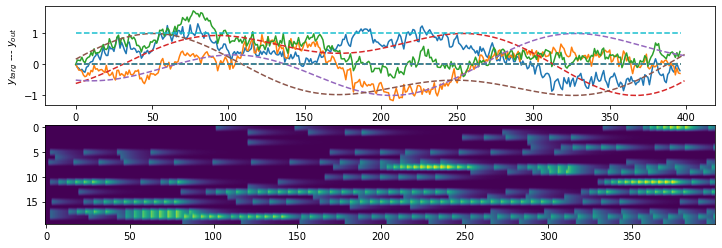

0.9225662191410898


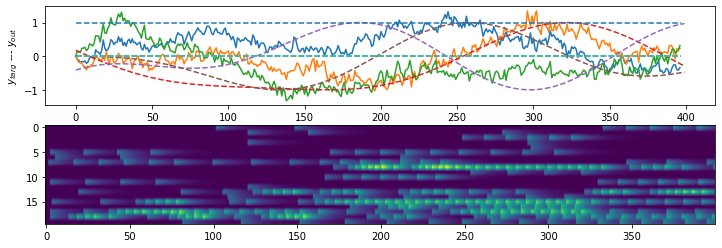

0.7703670631032926


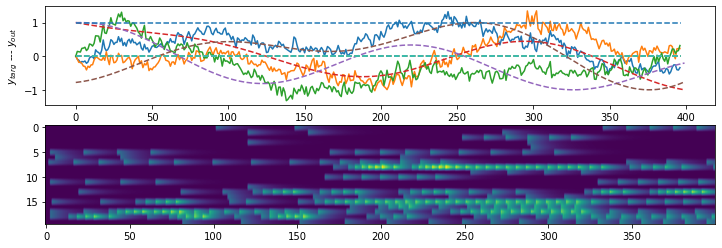

0.6746746306012794


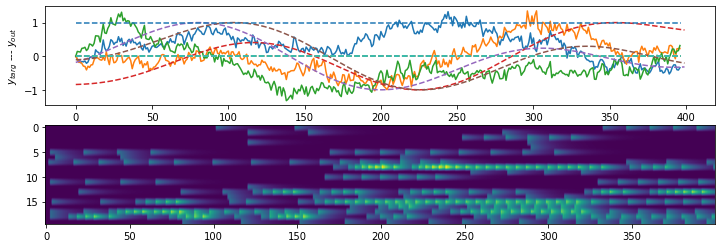

0.5788406778685301


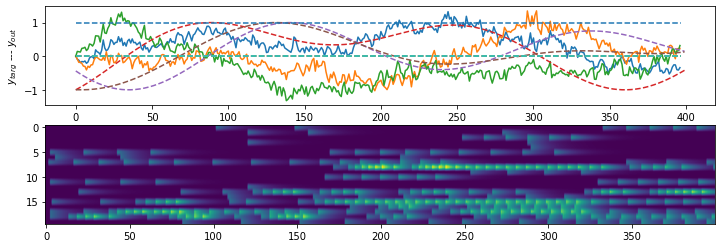

0.12726268326935472


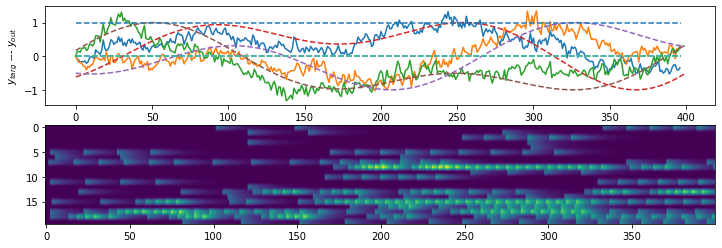

In [21]:
MSE = np.zeros((n_contexts,n_contexts))

for cont_index_i in range(n_contexts):
    for cont_index in range(n_contexts):

        context = []

        lttb.cont = lttb.cont*0
        lttb.cont[cont_index_i] = 1

        lttb.y_targ = lttb.y_targ_collection[cont_index]

        lttb.initialize(par)

        #run simulation

        apicalFactor = 0

        for t in range(lttb.T-2):

            if t==200:
                apicalFactor = 0
                #lttb.cont = lttb.cont*0.1
                #lttb.cont[0] = 1
            context.append(lttb.cont)

            lttb.step(apicalFactor = apicalFactor)

        SR = lttb.S_filtRO[:,1:-2]#lttb.B_filt_rec[:,1:-2]#
        Y = lttb.Jout@SR
        mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

        print(mse_rec_train)
        MSE[cont_index_i,cont_index] = mse_rec_train

    #mse, Y = lttb.train_ro(par,out_epochs = 1)

        plt.figure(figsize=(12, 4))
        plt.subplot(211)
        plt.plot(Y.T)
        plt.plot(lttb.y_targ.T,'--')
        plt.plot(np.array(context),'--')

        plt.xlabel('time(s)')
        plt.ylabel('$y_{targ}$ --- $y_{out}$')
        plt.subplot(212)
        plt.imshow(lttb.S_filtRO[0:20,:],aspect='auto')

        #plt.subplot(313)
        #plt.imshow(lttb.S_wind[0:20,:],aspect='auto')

        plt.show()

Text(0, 0.5, 'context')

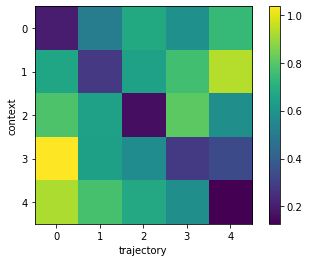

In [22]:
plt.imshow(MSE)
plt.colorbar()
plt.xlabel('trajectory')
plt.ylabel('context')